In [9]:
import json
import os
from rouge_score import rouge_scorer
import random
from rich import console
import seaborn as sns
from matplotlib import pyplot as plt

console = console.Console()

In [25]:
file_name = "completions.json"
data = json.load(open(file_name))
prompts = [d["prompt"] for d in data]

words_to_remove = ["email", "campaign", "promotional", "tone", "create"]
phrases_to_remove = ["Create a subject line", "for an", "in a", "a subject line", "a personalised subject line"]

def remove_words(prompt):
	words = prompt.split()
	words = [w for w in words if w not in words_to_remove]
	return " ".join(words)

def remove_phrases(prompt):
	for phrase in phrases_to_remove:
		prompt = prompt.replace(phrase, "")
	return prompt

for i in range(10):
	p = random.choice(prompts)
	# Lowercase
	p = p.lower()
	p = remove_phrases(p)
	p = remove_words(p)
	console.print(p)

a subject line formal introducing the new loyalty program. include {{shop_name}}.

compassionate announcing a charity event. include {{contact.first_name|default:kind heart}}, include {{shop_name}}.

convincing announcing the introduction of a new eco-friendly product range. include 
{{contact.first_name|default:eco warrior}}, include {{shop_name}}.

friendly announcing a new fitness product launch. include {{contact.first_name|default:fitness enthusiast}}, 
include {{shop_name}}.

develop enthusiastic promoting a weekend flash sale. include {{shop_name}}, {{contact.first_name|default:shopper}} 
and {{contact.last_name|default:friend}}.

professional announcing a special diwali sale. include {{shop_name}}

bold announcing a clearance sale. include {{contact.first_name|default:there}}, include {{shop_name}}

luxury announcing the arrival of a premium fashion line. include {{contact.first_name|default:luxury lover}}, 
include {{shop_name}}.

a subject line formal introducing the new loyalty program. include {{shop_name}}.

joyful announcing a special holi sale. include {{contact.first_name|default:celebrator}}, include {{shop_name}}.

In [26]:
def main():
	scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
	scores = []
	for i in range(10000):
		example_1 = random.choice(prompts)
		example_2 = random.choice(prompts)
		while example_1 == example_2:
			example_2 = random.choice(prompts)

		example_1 = example_1.lower()
		example_1 = remove_phrases(example_1)
		example_1 = remove_words(example_1)
		example_2 = example_2.lower()
		example_2 = remove_phrases(example_2)
		example_2 = remove_words(example_2)

		score = scorer.score(example_1, example_2)
		scores.append(score)

	precision = [s['rouge1'].precision for s in scores]
	recall = [s['rouge1'].recall for s in scores]
	fmeasure = [s['rouge1'].fmeasure for s in scores]

	# Plot the scores
	sns.set_theme(style="whitegrid")

	# Make a figure with 3 subplots
	fig, axes = plt.subplots(3, 1, figsize=(10, 15))
	fig.suptitle('Similarity Scores')

	BINS = 50
	# Plot each subplot
	sns.histplot(ax=axes[0], data=precision, bins=BINS)
	axes[0].set_title("Precision")

	sns.histplot(ax=axes[1], data=recall, bins=BINS)
	axes[1].set_title("Recall")

	sns.histplot(ax=axes[2], data=fmeasure, bins=BINS)
	axes[2].set_title("F-measure")

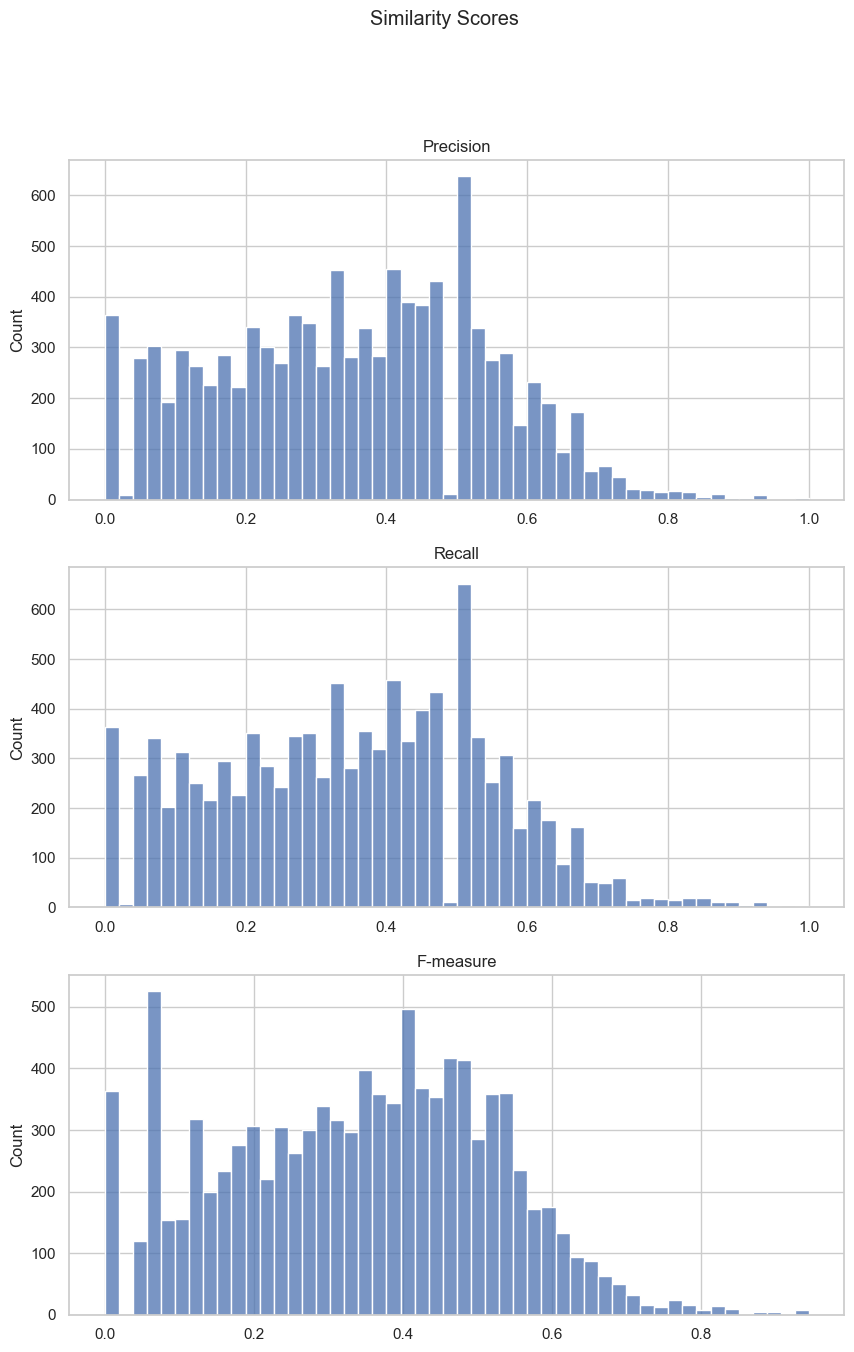

In [27]:
main()